# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
# YOUR CODE HERE!
## Assuming the amount of crypto assets: `1.2` BTC and `5.3` ETH.
my_btc=1.2
my_eth=5.3

# Assume the following amount of shares in stocks and bonds: `50` SPY (stocks) and `200` AGG (bonds).

my_spy=50
my_agg=200

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
response_data=requests.get(btc_url).json()
btc_price_per_unit=response_data['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
response_data=requests.get(eth_url).json()
eth_price_per_unit=response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value=btc_price_per_unit*my_btc
my_eth_value=eth_price_per_unit*my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43740.00
The current value of your 5.3 ETH is $12951.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
    

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df


# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low    close   volume   open   
time                                                                         
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.3   

                                                          
                             high  low   close    volume  
time                                                      
2020-07-14 00:00:00-04:00  319.76  312  318.89  79292036

In [11]:
# Pick AGG and SPY close prices
agg_close_price=float(df_portfolio['AGG']['close'])
spy_close_price=float(df_portfolio['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $118.655
Current SPY closing price: $318.89


In [12]:
# Compute the current value of shares
my_spy_value=my_spy*agg_close_price
my_agg_value=my_agg*spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5932.75
The current value of your 200 AGG shares is $63778.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
crypto=my_btc_value+my_eth_value
shares=my_agg_value+my_spy_value

# Create savings DataFrame
df_savings=pd.DataFrame(data={'amount':[crypto,shares]},index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,56691.504
shares,69710.750


array([<AxesSubplot:ylabel='amount'>], dtype=object)

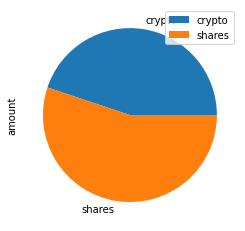

In [14]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving=df_savings.amount.sum()

# Validate saving health
if total_saving > emergency_fund:
    print("congratulation for having enough money in this fund.")
elif total_saving==emergency_fund:
    print("congratulating on reaching this financial goal")
else:
    amount_need_for_goal=emergency_fund-total_saving
    print(f"you are ${amount_need_for_goal:0.2f} away from your goal")
     

congratulation for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-01', tz='America/New_York').isoformat()



In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high      low     close   volume   
time                                                                     
2018-01-12 00:00:00-05:00  108.64  108.830  108.630  108.7401  2950016   
2018-01-16 00:00:00-05:00  108.87  108.980  108.715  108.7600  6011248   
2018-01-17 00:00:00-05:00  108.73  108.839  108.620  108.6500  2880481   
2018-01-18 00:00:00-05:00  108.43  108.525  108.350  108.3800  2681682   
2018-01-19 00:00:00-05:00  108.40  108.400  108.140  108.1500  2751607   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2018-01-12 00:00:00-05:00  276.42  278.11  276.27  277.91  53855427  
2018-01-16 00:00:00-05:00  279.35  280.09  276.18  276.96  70240852  
2018-01-17 00:00:00-05:00  278.04  280.05  277.19  279.61  62162956  
2018-01-18 00:00:00-05:00  279.50  279.96  278.58  279.18  57402163  
2018-01-19 00:00:00-05:00  279.80  280.40  279.14  280.38  55178145

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC= MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
df_stock_data.head()

AGG                                       \
                             open     high      low     close   volume   
time                                                                     
2018-01-12 00:00:00-05:00  108.64  108.830  108.630  108.7401  2950016   
2018-01-16 00:00:00-05:00  108.87  108.980  108.715  108.7600  6011248   
2018-01-17 00:00:00-05:00  108.73  108.839  108.620  108.6500  2880481   
2018-01-18 00:00:00-05:00  108.43  108.525  108.350  108.3800  2681682   
2018-01-19 00:00:00-05:00  108.40  108.400  108.140  108.1500  2751607   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2018-01-12 00:00:00-05:00  276.42  278.11  276.27  277.91  53855427  
2018-01-16 00:00:00-05:00  279.35  280.09  276.18  276.96  70240852  
2018-01-17 00:00:00-05:00  278.04  280.05  277.19  279.61  62162956  
2018-01-18 00:00:00-05:00  279.50  279.96  278.58  279.18  57402163  
2018-01-19 00:00:00-05:00  279.80  280.40  279.14  280.38  55178145

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()




Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/manishrajkarnikar/workspace/bootcamp/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001742,0.990330,0.995358,0.997574,0.989363,0.998701,1.000750,1.000525,0.998772,1.003204,...,0.999414,1.008335,1.005040,0.999583,1.007284,0.992366,0.995640,1.012225,0.995317,1.002565
2,0.995074,0.993001,0.993957,1.004403,0.985900,0.996497,1.008786,1.004995,1.005871,1.001646,...,0.992979,1.007477,0.996389,1.001058,0.998643,0.991925,1.003497,1.014968,1.001817,0.992668
3,1.000396,1.004219,0.986126,0.994840,0.985555,1.003331,0.998752,0.996942,1.012687,1.001654,...,0.987052,1.012746,0.999596,0.999778,0.986813,0.983004,1.012365,1.025066,1.007740,1.008382
4,0.999790,1.010882,0.983780,0.994171,0.988140,0.996738,0.989282,0.999753,1.026533,1.000597,...,0.991577,1.016207,1.000671,1.011710,0.985568,0.983277,1.014641,1.021144,1.002417,1.008899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.908507,15.757816,2.626856,7.416177,6.770230,23.953651,8.167118,8.219743,9.771786,11.033871,...,14.631081,5.103021,30.118860,14.392328,13.911152,9.139656,12.916439,15.035193,13.711289,19.745284
7557,17.842294,15.825063,2.623899,7.454442,6.832940,23.942677,8.171225,8.284153,9.694274,11.012842,...,14.768283,5.081837,29.925303,14.534967,13.811652,8.986246,12.893916,15.021866,13.699545,19.707450
7558,17.978245,15.745921,2.633374,7.436433,6.767714,23.608148,8.158670,8.249871,9.610832,11.074706,...,14.845020,5.090747,29.877235,14.466868,14.053417,8.932330,12.860870,14.975799,13.584112,19.576779
7559,18.191758,15.601787,2.685322,7.526298,6.811771,23.794301,8.179978,8.367041,9.648516,11.178080,...,14.913634,5.110550,29.601208,14.420717,14.118115,8.917350,12.980894,15.037165,13.654630,19.486387


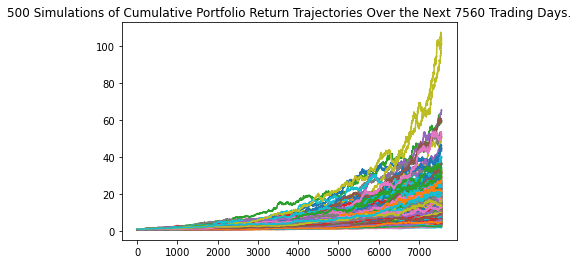

In [21]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()



<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

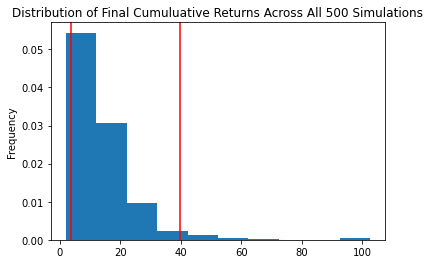

In [22]:
# Plot probability distribution and confidence intervals
MC.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             13.839159
std              10.715921
min               1.899215
25%               7.463820
50%              11.261264
75%              16.086405
max             102.676381
95% CI Lower      3.551111
95% CI Upper     39.864970
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71022.22 and $797299.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $106533.33 and $1195949.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC= MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/manishrajkarnikar/workspace/bootcamp/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002429,0.997094,1.000127,1.005968,0.995496,1.004622,1.005114,1.003169,1.001545,0.998370,...,0.995119,0.995726,0.994910,0.999747,0.998361,1.000095,0.995421,1.001010,0.996465,0.996018
2,1.002429,0.994910,1.002291,1.007287,0.985921,1.005947,0.989811,0.999729,0.996388,1.000158,...,0.988134,1.001533,0.998605,1.000693,1.004278,0.995077,0.989292,0.988834,0.989281,0.998051
3,1.004244,0.999802,0.997633,1.023665,0.984562,1.008781,0.989489,1.001177,0.986789,0.993342,...,0.995525,0.999233,0.997302,0.996882,0.998150,0.989159,0.991959,0.984233,0.989532,0.999164
4,1.003840,0.994239,1.004226,1.022724,0.981249,0.997596,0.989552,1.005120,0.995749,0.987772,...,1.001265,0.992389,0.993590,0.994244,0.991471,0.988367,0.979541,0.995223,0.988036,1.003846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.563041,1.186572,1.413324,1.116949,1.579627,1.514557,2.160675,1.333566,1.078014,1.287167,...,1.986848,1.741575,1.120474,1.722887,1.414550,1.249039,1.367950,1.944499,1.332490,1.648064
1257,1.569963,1.187114,1.419583,1.123408,1.595696,1.513418,2.142858,1.328695,1.073719,1.308927,...,1.970110,1.763231,1.132519,1.701247,1.420332,1.253400,1.377185,1.934096,1.327394,1.671593
1258,1.570669,1.179047,1.417642,1.131724,1.603904,1.515970,2.163482,1.329446,1.071248,1.314566,...,1.948389,1.782681,1.138377,1.676845,1.422241,1.269635,1.384201,1.951736,1.345251,1.676438
1259,1.576869,1.174035,1.421087,1.130795,1.613918,1.499635,2.149918,1.326803,1.066533,1.327603,...,1.978189,1.812344,1.142765,1.695704,1.428060,1.276893,1.390888,1.953151,1.356766,1.661560


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

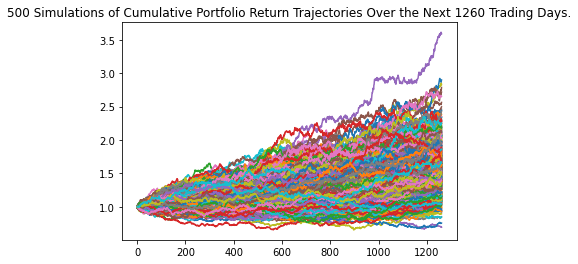

In [28]:
# Plot simulation outcomes
MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

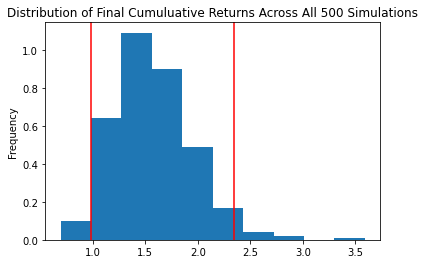

In [29]:
# Plot probability distribution and confidence intervals
MC.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.570360
std               0.372775
min               0.693011
25%               1.314272
50%               1.530845
75%               1.782737
max               3.591346
95% CI Lower      0.978839
95% CI Upper      2.344804
Name: 1260, dtype: float64


In [32]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)




# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58730.35 and $140688.27


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC= MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/manishrajkarnikar/workspace/bootcamp/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999636,1.001505,1.003561,0.999985,0.986525,1.008586,0.995904,1.004903,0.997812,1.005670,...,1.002863,1.001171,1.011718,1.002300,1.014232,0.991380,0.999174,1.001521,0.997585,0.998490
2,1.010828,1.003151,0.996677,1.005005,0.988782,1.010524,0.985125,1.003982,0.998917,1.011686,...,1.006164,1.017084,1.017799,1.005367,1.025796,0.991674,1.015627,0.996449,0.993911,0.996713
3,1.004169,1.007603,0.984966,1.003949,1.000051,1.016200,0.986516,1.012850,1.006073,1.009812,...,1.008303,1.020047,1.017165,1.009574,1.029838,0.984681,1.018008,0.990121,0.998292,1.010293
4,1.014830,1.020031,0.974832,1.005034,1.005134,1.018079,0.995435,1.011699,1.005176,1.000242,...,1.008523,1.035014,1.013815,1.000661,1.039028,0.975393,1.026051,0.997835,0.993162,1.012245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.459903,3.252431,1.337345,2.350103,2.046763,2.496662,1.431910,1.679030,3.971331,2.438443,...,3.437896,2.091035,2.259762,1.638183,2.207319,3.850029,2.626362,2.276856,1.620972,2.537382
2517,3.490877,3.261593,1.321595,2.345402,2.034020,2.505468,1.453286,1.680468,3.981574,2.417790,...,3.504621,2.075443,2.281850,1.645821,2.210318,3.826083,2.665123,2.291807,1.632448,2.530140
2518,3.476132,3.276539,1.326263,2.331683,2.031496,2.510311,1.442739,1.680519,4.029138,2.437334,...,3.524389,2.068098,2.301670,1.642597,2.216839,3.840031,2.639295,2.307941,1.636532,2.539912
2519,3.500219,3.302992,1.324611,2.348720,2.049724,2.508434,1.450395,1.682172,4.030326,2.434624,...,3.560937,2.069825,2.322451,1.632983,2.225255,3.826981,2.637869,2.294255,1.637412,2.571351


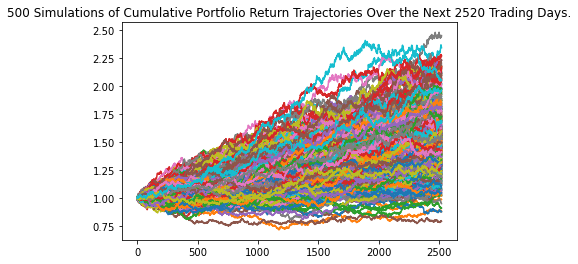

In [32]:
# Plot simulation outcomes
MC.plot_simulation()

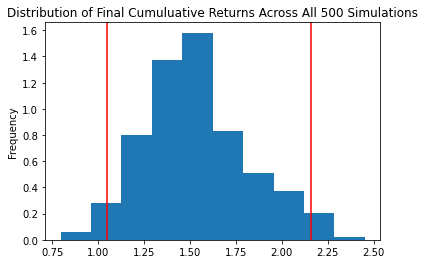

In [33]:
# Plot probability distribution and confidence intervals
MC.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
MC.plot_distribution()

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)




# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $58730.35 and $140688.27
